### The falling slinky

Slinky is a simple and fun toy made from a flexible 90-turn spring, that contains ```20 meters``` of flat steel wire.

<img src="slinky.jpg" width=350> 

When submitted to free fall, the bottom of the Slinky floats for a few moments. Even when a tennis ball is attached to de bottom of the toy, it continues to "defy gravity". This floating period will be called "reaction time". But that's not all! The top part of the Slinky appears to fall with constant speed.

Check the video that inspired the project: https://www.youtube.com/watch?v=eCMmmEEyOO0

#### Discretization

Strictly speaking, the toy is not an ideal spring - it has mass and elasticity continuosly dristibuted. Yet, in order to make the simulation feasible, the Slinky will be represented as a series of masses connected by ideal springs.

<img src="slinky_dicretization.png" width=700> 

#### Questions to be answered by the model

- How does the reaction time of the bottom of the Slinky changes with different attached masses in the toy?
- How does the falling speed of the top of the Slinky changes with different attached masses in the toy?


### Model

First, lets analyze the forces acting on a generic mass of the Slinky.

<img src="forças.jpg" width=300> 

Consider a downward-facing axis that begins in the starting position of the top mass, and let y(i) be the position of the generic mass. Thereby:

<center>$F1=-k\cdot [y(i)-y(i-1)-l0]$</center>
<center>$F2=k\cdot [y(i+1)-y(i)-l0]$</center>
<center>$Fgrav=m\cdot g$</center>


The first and the last massa have, respectively, $F1=0$ e $F2=0$.


Let's import the necessary libraries, define essential parameters and starting positions.

In [1]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#general constants

N = 90       # number of masses 
L = 0.575    # Slinky lenght (m)
K = 1.75     # Slinky elasticity (N/m)
M = 0.225    # Slinky overall mass (kg)
g = 9.8      # gravity's acceleration
H = 1.87

mu = 0       # attached mass on the bottom of the Slinky

#constants

m = M/N      # splited mass
l0 = L/(N-1) # individual lenght of each ideal spring
k = K*(N-1)  # individual elasticity of each ideal spring

#define starting positions

y_inicial = [0]       # starting position of the top mass
j = (M + mu - m)
i = 1
while i < N:
    y_inicial.append(y_inicial[i-1] + l0 + j*g/k)     # adds the starting positions of masses in a list, according to the balance of forces
    j -= m
    i += 1

Each mass has a different differential equation, that depends of its position and of the adjacents masses postition. That's why, the ```modelo``` function, that contains the differential equations of the system, is defined this way:

In [2]:
#defines function that will be used by odeint

def modelo(l, t, mu):
    y0 = l[0]
    vy0 = l[1] 
    y1 = l[2]
    vy1 = l[3] 
    y2 = l[4]
    vy2 = l[5]  
    y3 = l[6]
    vy3 = l[7] 
    y4 = l[8]
    vy4 = l[9] 
    y5 = l[10]
    vy5 = l[11]
    y6 = l[12]
    vy6 = l[13] 
    y7 = l[14]
    vy7 = l[15] 
    y8 = l[16]
    vy8 = l[17]  
    y9 = l[18]
    vy9 = l[19]
    y10 = l[20]
    vy10 = l[21] 
    y11 = l[22]
    vy11 = l[23] 
    y12 = l[24]
    vy12 = l[25]  
    y13 = l[26]
    vy13 = l[27] 
    y14 = l[28]
    vy14 = l[29] 
    y15 = l[30]
    vy15 = l[31]
    y16 = l[32]
    vy16 = l[33] 
    y17 = l[34]
    vy17 = l[35] 
    y18 = l[36]
    vy18 = l[37]  
    y19 = l[38]
    vy19 = l[39]
    y20 = l[40]
    vy20 = l[41] 
    y21 = l[42]
    vy21 = l[43] 
    y22 = l[44]
    vy22 = l[45]  
    y23 = l[46]
    vy23 = l[47] 
    y24 = l[48]
    vy24 = l[49] 
    y25 = l[50]
    vy25 = l[51]
    y26 = l[52]
    vy26 = l[53] 
    y27 = l[54]
    vy27 = l[55] 
    y28 = l[56]
    vy28 = l[57]  
    y29 = l[58]
    vy29 = l[59]
    y30 = l[60]
    vy30 = l[61] 
    y31 = l[62]
    vy31 = l[63] 
    y32 = l[64]
    vy32 = l[65]  
    y33 = l[66]
    vy33 = l[67] 
    y34 = l[68]
    vy34 = l[69] 
    y35 = l[70]
    vy35 = l[71]
    y36 = l[72]
    vy36 = l[73] 
    y37 = l[74]
    vy37 = l[75] 
    y38 = l[76]
    vy38 = l[77]  
    y39 = l[78]
    vy39 = l[79]
    y40 = l[80]
    vy40 = l[81] 
    y41 = l[82]
    vy41 = l[83] 
    y42 = l[84]
    vy42 = l[85]  
    y43 = l[86]
    vy43 = l[87] 
    y44 = l[88]
    vy44 = l[89] 
    y45 = l[90]
    vy45 = l[91]
    y46 = l[92]
    vy46 = l[93] 
    y47 = l[94]
    vy47 = l[95] 
    y48 = l[96]
    vy48 = l[97]  
    y49 = l[98]
    vy49 = l[99]
    y50 = l[100]
    vy50 = l[101] 
    y51 = l[102]
    vy51 = l[103] 
    y52 = l[104]
    vy52 = l[105]  
    y53 = l[106]
    vy53 = l[107] 
    y54 = l[108]
    vy54 = l[109] 
    y55 = l[110]
    vy55 = l[111]
    y56 = l[112]
    vy56 = l[113] 
    y57 = l[114]
    vy57 = l[115] 
    y58 = l[116]
    vy58 = l[117]  
    y59 = l[118]
    vy59 = l[119]
    y60 = l[120]
    vy60 = l[121] 
    y61 = l[122]
    vy61 = l[123] 
    y62 = l[124]
    vy62 = l[125]  
    y63 = l[126]
    vy63 = l[127] 
    y64 = l[128]
    vy64 = l[129] 
    y65 = l[130]
    vy65 = l[131]
    y66 = l[132]
    vy66 = l[133] 
    y67 = l[134]
    vy67 = l[135] 
    y68 = l[136]
    vy68 = l[137]  
    y69 = l[138]
    vy69 = l[139]
    y70 = l[140]
    vy70 = l[141] 
    y71 = l[142]
    vy71 = l[143] 
    y72 = l[144]
    vy72 = l[145]  
    y73 = l[146]
    vy73 = l[147] 
    y74 = l[148]
    vy74 = l[149] 
    y75 = l[150]
    vy75 = l[151]
    y76 = l[152]
    vy76 = l[153] 
    y77 = l[154]
    vy77 = l[155] 
    y78 = l[156]
    vy78 = l[157]  
    y79 = l[158]
    vy79 = l[159]
    y80 = l[160]
    vy80 = l[161] 
    y81 = l[162]
    vy81 = l[163] 
    y82 = l[164]
    vy82 = l[165]  
    y83 = l[166]
    vy83 = l[167] 
    y84 = l[168]
    vy84 = l[169] 
    y85 = l[170]
    vy85 = l[171]
    y86 = l[172]
    vy86 = l[173] 
    y87 = l[174]
    vy87 = l[175] 
    y88 = l[176]
    vy88 = l[177]  
    y89 = l[178]
    vy89 = l[179]
    
    if y89 <= H:           # while the bottom mass doesnt touches the ground
        dy0dt = vy0
        dy1dt = vy1
        dy2dt = vy2
        dy3dt = vy3
        dy4dt = vy4
        dy5dt = vy5
        dy6dt = vy6
        dy7dt = vy7
        dy8dt = vy8
        dy9dt = vy9
        dy10dt = vy10
        dy11dt = vy11
        dy12dt = vy12
        dy13dt = vy13
        dy14dt = vy14
        dy15dt = vy15
        dy16dt = vy16
        dy17dt = vy17
        dy18dt = vy18
        dy19dt = vy19
        dy20dt = vy20
        dy21dt = vy21
        dy22dt = vy22
        dy23dt = vy23
        dy24dt = vy24
        dy25dt = vy25
        dy26dt = vy26
        dy27dt = vy27
        dy28dt = vy28
        dy29dt = vy29
        dy30dt = vy30
        dy31dt = vy31
        dy32dt = vy32
        dy33dt = vy33
        dy34dt = vy34
        dy35dt = vy35
        dy36dt = vy36
        dy37dt = vy37
        dy38dt = vy38
        dy39dt = vy39
        dy40dt = vy40
        dy41dt = vy41
        dy42dt = vy42
        dy43dt = vy43
        dy44dt = vy44
        dy45dt = vy45
        dy46dt = vy46
        dy47dt = vy47
        dy48dt = vy48
        dy49dt = vy49
        dy50dt = vy50
        dy51dt = vy51
        dy52dt = vy52
        dy53dt = vy53
        dy54dt = vy54
        dy55dt = vy55
        dy56dt = vy56
        dy57dt = vy57
        dy58dt = vy58
        dy59dt = vy59
        dy60dt = vy60
        dy61dt = vy61
        dy62dt = vy62
        dy63dt = vy63
        dy64dt = vy64
        dy65dt = vy65
        dy66dt = vy66
        dy67dt = vy67
        dy68dt = vy68
        dy69dt = vy69
        dy70dt = vy70
        dy71dt = vy71
        dy72dt = vy72
        dy73dt = vy73
        dy74dt = vy74
        dy75dt = vy75
        dy76dt = vy76
        dy77dt = vy77
        dy78dt = vy78
        dy79dt = vy79
        dy80dt = vy80
        dy81dt = vy81
        dy82dt = vy82
        dy83dt = vy83
        dy84dt = vy84
        dy85dt = vy85
        dy86dt = vy86
        dy87dt = vy87
        dy88dt = vy88
        dy89dt = vy89
        dvy0dt = (1/m)*(m*g + k*(y1 - y0 - l0))                            
        dvy1dt = (1/m)*(m*g + k*(y2 - y1 - l0) - k*(y1 - y0 - l0))
        dvy2dt = (1/m)*(m*g + k*(y3 - y2 - l0) - k*(y2 - y1 - l0))
        dvy3dt = (1/m)*(m*g + k*(y4 - y3 - l0) - k*(y3 - y2 - l0))
        dvy4dt = (1/m)*(m*g + k*(y5 - y4 - l0) - k*(y4 - y3 - l0))
        dvy5dt = (1/m)*(m*g + k*(y6 - y5 - l0) - k*(y5 - y4 - l0))    
        dvy6dt = (1/m)*(m*g + k*(y7 - y6 - l0) - k*(y6 - y5 - l0))
        dvy7dt = (1/m)*(m*g + k*(y8 - y7 - l0) - k*(y7 - y6 - l0))    
        dvy8dt = (1/m)*(m*g + k*(y9 - y8 - l0) - k*(y8 - y7 - l0))
        dvy9dt = (1/m)*(m*g + k*(y10 - y9 - l0) - k*(y9 - y8 - l0))
        dvy10dt = (1/m)*(m*g + k*(y11 - y10 - l0) - k*(y10 - y9 - l0))
        dvy11dt = (1/m)*(m*g + k*(y12 - y11 - l0) - k*(y11 - y10 - l0))
        dvy12dt = (1/m)*(m*g + k*(y13 - y12 - l0) - k*(y12 - y11 - l0))
        dvy13dt = (1/m)*(m*g + k*(y14 - y13 - l0) - k*(y13 - y12 - l0))
        dvy14dt = (1/m)*(m*g + k*(y15 - y14 - l0) - k*(y14 - y13 - l0))
        dvy15dt = (1/m)*(m*g + k*(y16 - y15 - l0) - k*(y15 - y14 - l0))
        dvy16dt = (1/m)*(m*g + k*(y17 - y16 - l0) - k*(y16 - y15 - l0))
        dvy17dt = (1/m)*(m*g + k*(y18 - y17 - l0) - k*(y17 - y16 - l0))   
        dvy18dt = (1/m)*(m*g + k*(y19 - y18 - l0) - k*(y18 - y17 - l0))    
        dvy19dt = (1/m)*(m*g + k*(y20 - y19 - l0) - k*(y19 - y18 - l0))
        dvy20dt = (1/m)*(m*g + k*(y21 - y20 - l0) - k*(y20 - y19 - l0))
        dvy21dt = (1/m)*(m*g + k*(y22 - y21 - l0) - k*(y21 - y20 - l0))
        dvy22dt = (1/m)*(m*g + k*(y23 - y22 - l0) - k*(y22 - y21 - l0))
        dvy23dt = (1/m)*(m*g + k*(y24 - y23 - l0) - k*(y23 - y22 - l0))
        dvy24dt = (1/m)*(m*g + k*(y25 - y24 - l0) - k*(y24 - y23 - l0))
        dvy25dt = (1/m)*(m*g + k*(y26 - y25 - l0) - k*(y25 - y24 - l0))
        dvy26dt = (1/m)*(m*g + k*(y27 - y26 - l0) - k*(y26 - y25 - l0))
        dvy27dt = (1/m)*(m*g + k*(y28 - y27 - l0) - k*(y27 - y26 - l0))
        dvy28dt = (1/m)*(m*g + k*(y29 - y28 - l0) - k*(y28 - y27 - l0))
        dvy29dt = (1/m)*(m*g + k*(y30 - y29 - l0) - k*(y29 - y28 - l0))
        dvy30dt = (1/m)*(m*g + k*(y31 - y30 - l0) - k*(y30 - y29 - l0))
        dvy31dt = (1/m)*(m*g + k*(y32 - y31 - l0) - k*(y31 - y30 - l0))
        dvy32dt = (1/m)*(m*g + k*(y33 - y32 - l0) - k*(y32 - y31 - l0))
        dvy33dt = (1/m)*(m*g + k*(y34 - y33 - l0) - k*(y33 - y32 - l0))
        dvy34dt = (1/m)*(m*g + k*(y35 - y34 - l0) - k*(y34 - y33 - l0))
        dvy35dt = (1/m)*(m*g + k*(y36 - y35 - l0) - k*(y35 - y34 - l0))
        dvy36dt = (1/m)*(m*g + k*(y37 - y36 - l0) - k*(y36 - y35 - l0))    
        dvy37dt = (1/m)*(m*g + k*(y38 - y37 - l0) - k*(y37 - y36 - l0))
        dvy38dt = (1/m)*(m*g + k*(y39 - y38 - l0) - k*(y38 - y37 - l0))    
        dvy39dt = (1/m)*(m*g + k*(y40 - y39 - l0) - k*(y39 - y38 - l0))
        dvy40dt = (1/m)*(m*g + k*(y41 - y40 - l0) - k*(y40 - y39 - l0))
        dvy41dt = (1/m)*(m*g + k*(y42 - y41 - l0) - k*(y41 - y40 - l0))
        dvy42dt = (1/m)*(m*g + k*(y43 - y42 - l0) - k*(y42 - y41 - l0))
        dvy43dt = (1/m)*(m*g + k*(y44 - y43 - l0) - k*(y43 - y42 - l0))
        dvy44dt = (1/m)*(m*g + k*(y45 - y44 - l0) - k*(y44 - y43 - l0))
        dvy45dt = (1/m)*(m*g + k*(y46 - y45 - l0) - k*(y45 - y44 - l0))
        dvy46dt = (1/m)*(m*g + k*(y47 - y46 - l0) - k*(y46 - y45 - l0))
        dvy47dt = (1/m)*(m*g + k*(y48 - y47 - l0) - k*(y47 - y46 - l0))
        dvy48dt = (1/m)*(m*g + k*(y49 - y48 - l0) - k*(y48 - y47 - l0))
        dvy49dt = (1/m)*(m*g + k*(y50 - y49 - l0) - k*(y49 - y48 - l0))
        dvy50dt = (1/m)*(m*g + k*(y51 - y50 - l0) - k*(y50 - y49 - l0))    
        dvy51dt = (1/m)*(m*g + k*(y52 - y51 - l0) - k*(y51 - y50 - l0))
        dvy52dt = (1/m)*(m*g + k*(y53 - y52 - l0) - k*(y52 - y51 - l0))
        dvy53dt = (1/m)*(m*g + k*(y54 - y53 - l0) - k*(y53 - y52 - l0))
        dvy54dt = (1/m)*(m*g + k*(y55 - y54 - l0) - k*(y54 - y53 - l0))
        dvy55dt = (1/m)*(m*g + k*(y56 - y55 - l0) - k*(y55 - y54 - l0))
        dvy56dt = (1/m)*(m*g + k*(y57 - y56 - l0) - k*(y56 - y55 - l0))
        dvy57dt = (1/m)*(m*g + k*(y58 - y57 - l0) - k*(y57 - y56 - l0))
        dvy58dt = (1/m)*(m*g + k*(y59 - y58 - l0) - k*(y58 - y57 - l0))
        dvy59dt = (1/m)*(m*g + k*(y60 - y59 - l0) - k*(y59 - y58 - l0))
        dvy60dt = (1/m)*(m*g + k*(y61 - y60 - l0) - k*(y60 - y59 - l0))
        dvy61dt = (1/m)*(m*g + k*(y62 - y61 - l0) - k*(y61 - y60 - l0))
        dvy62dt = (1/m)*(m*g + k*(y63 - y62 - l0) - k*(y62 - y61 - l0))    
        dvy63dt = (1/m)*(m*g + k*(y64 - y63 - l0) - k*(y63 - y62 - l0))    
        dvy64dt = (1/m)*(m*g + k*(y65 - y64 - l0) - k*(y64 - y63 - l0))
        dvy65dt = (1/m)*(m*g + k*(y66 - y65 - l0) - k*(y65 - y64 - l0))
        dvy66dt = (1/m)*(m*g + k*(y67 - y66 - l0) - k*(y66 - y65 - l0))
        dvy67dt = (1/m)*(m*g + k*(y68 - y67 - l0) - k*(y67 - y66 - l0))
        dvy68dt = (1/m)*(m*g + k*(y69 - y68 - l0) - k*(y68 - y67 - l0))
        dvy69dt = (1/m)*(m*g + k*(y70 - y69 - l0) - k*(y69 - y68 - l0))
        dvy70dt = (1/m)*(m*g + k*(y71 - y70 - l0) - k*(y70 - y69 - l0))
        dvy71dt = (1/m)*(m*g + k*(y72 - y71 - l0) - k*(y71 - y70 - l0))
        dvy72dt = (1/m)*(m*g + k*(y73 - y72 - l0) - k*(y72 - y71 - l0))
        dvy73dt = (1/m)*(m*g + k*(y74 - y73 - l0) - k*(y73 - y72 - l0))
        dvy74dt = (1/m)*(m*g + k*(y75 - y74 - l0) - k*(y74 - y73 - l0))
        dvy75dt = (1/m)*(m*g + k*(y76 - y75 - l0) - k*(y75 - y74 - l0))    
        dvy76dt = (1/m)*(m*g + k*(y77 - y76 - l0) - k*(y76 - y75 - l0))
        dvy77dt = (1/m)*(m*g + k*(y78 - y77 - l0) - k*(y77 - y76 - l0)) 
        dvy78dt = (1/m)*(m*g + k*(y79 - y78 - l0) - k*(y78 - y77 - l0))
        dvy79dt = (1/m)*(m*g + k*(y80 - y79 - l0) - k*(y79 - y78 - l0))
        dvy80dt = (1/m)*(m*g + k*(y81 - y80 - l0) - k*(y80 - y79 - l0))
        dvy81dt = (1/m)*(m*g + k*(y82 - y81 - l0) - k*(y81 - y80 - l0))
        dvy82dt = (1/m)*(m*g + k*(y83 - y82 - l0) - k*(y82 - y81 - l0))
        dvy83dt = (1/m)*(m*g + k*(y84 - y83 - l0) - k*(y83 - y82 - l0))
        dvy84dt = (1/m)*(m*g + k*(y85 - y84 - l0) - k*(y84 - y83 - l0))
        dvy85dt = (1/m)*(m*g + k*(y86 - y85 - l0) - k*(y85 - y84 - l0))    
        dvy86dt = (1/m)*(m*g + k*(y87 - y86 - l0) - k*(y86 - y85 - l0))
        dvy87dt = (1/m)*(m*g + k*(y88 - y87 - l0) - k*(y87 - y86 - l0)) 
        dvy88dt = (1/m)*(m*g + k*(y89 - y88 - l0) - k*(y88 - y87 - l0))
        dvy89dt = (1/m)*(m*g - k*(y89 - y88 - l0) + mu*g)                  
    else:             # when  the bottom mass touches the ground
        dy0dt = 0
        dy1dt = 0
        dy2dt = 0
        dy3dt = 0
        dy4dt = 0
        dy5dt = 0
        dy6dt = 0
        dy7dt = 0
        dy8dt = 0
        dy9dt = 0
        dy10dt = 0
        dy11dt = 0
        dy12dt = 0
        dy13dt = 0
        dy14dt = 0
        dy15dt = 0
        dy16dt = 0
        dy17dt = 0
        dy18dt = 0
        dy19dt = 0
        dy20dt = 0
        dy21dt = 0
        dy22dt = 0
        dy23dt = 0
        dy24dt = 0
        dy25dt = 0
        dy26dt = 0
        dy27dt = 0
        dy28dt = 0
        dy29dt = 0
        dy30dt = 0
        dy31dt = 0
        dy32dt = 0
        dy33dt = 0
        dy34dt = 0
        dy35dt = 0
        dy36dt = 0
        dy37dt = 0
        dy38dt = 0
        dy39dt = 0
        dy40dt = 0
        dy41dt = 0
        dy42dt = 0
        dy43dt = 0
        dy44dt = 0
        dy45dt = 0
        dy46dt = 0
        dy47dt = 0
        dy48dt = 0
        dy49dt = 0
        dy50dt = 0
        dy51dt = 0
        dy52dt = 0
        dy53dt = 0
        dy54dt = 0
        dy55dt = 0
        dy56dt = 0
        dy57dt = 0
        dy58dt = 0
        dy59dt = 0
        dy60dt = 0
        dy61dt = 0
        dy62dt = 0
        dy63dt = 0
        dy64dt = 0
        dy65dt = 0
        dy66dt = 0
        dy67dt = 0
        dy68dt = 0
        dy69dt = 0
        dy70dt = 0
        dy71dt = 0
        dy72dt = 0
        dy73dt = 0
        dy74dt = 0
        dy75dt = 0
        dy76dt = 0
        dy77dt = 0
        dy78dt = 0
        dy79dt = 0
        dy80dt = 0
        dy81dt = 0
        dy82dt = 0
        dy83dt = 0
        dy84dt = 0
        dy85dt = 0
        dy86dt = 0
        dy87dt = 0
        dy88dt = 0
        dy89dt = 0
        dvy0dt = 0
        dvy1dt = 0
        dvy2dt = 0
        dvy3dt = 0
        dvy4dt = 0
        dvy5dt = 0
        dvy6dt = 0
        dvy7dt = 0
        dvy8dt = 0
        dvy9dt = 0
        dvy10dt = 0
        dvy11dt = 0
        dvy12dt = 0
        dvy13dt = 0
        dvy14dt = 0
        dvy15dt = 0
        dvy16dt = 0
        dvy17dt = 0
        dvy18dt = 0
        dvy19dt = 0
        dvy20dt = 0
        dvy21dt = 0
        dvy22dt = 0
        dvy23dt = 0
        dvy24dt = 0
        dvy25dt = 0
        dvy26dt = 0
        dvy27dt = 0
        dvy28dt = 0
        dvy29dt = 0
        dvy30dt = 0
        dvy31dt = 0
        dvy32dt = 0
        dvy33dt = 0
        dvy34dt = 0
        dvy35dt = 0
        dvy36dt = 0
        dvy37dt = 0
        dvy38dt = 0
        dvy39dt = 0
        dvy40dt = 0
        dvy41dt = 0
        dvy42dt = 0
        dvy43dt = 0
        dvy44dt = 0
        dvy45dt = 0
        dvy46dt = 0
        dvy47dt = 0
        dvy48dt = 0
        dvy49dt = 0
        dvy50dt = 0
        dvy51dt = 0
        dvy52dt = 0
        dvy53dt = 0
        dvy54dt = 0
        dvy55dt = 0
        dvy56dt = 0
        dvy57dt = 0
        dvy58dt = 0
        dvy59dt = 0
        dvy60dt = 0
        dvy61dt = 0
        dvy62dt = 0
        dvy63dt = 0
        dvy64dt = 0
        dvy65dt = 0
        dvy66dt = 0
        dvy67dt = 0
        dvy68dt = 0
        dvy69dt = 0
        dvy70dt = 0
        dvy71dt = 0
        dvy72dt = 0
        dvy73dt = 0
        dvy74dt = 0
        dvy75dt = 0
        dvy76dt = 0
        dvy77dt = 0
        dvy78dt = 0
        dvy79dt = 0
        dvy80dt = 0
        dvy81dt = 0
        dvy82dt = 0
        dvy83dt = 0
        dvy84dt = 0
        dvy85dt = 0
        dvy86dt = 0
        dvy87dt = 0
        dvy88dt = 0
        dvy89dt = 0
    
    dldt = [dy0dt, dvy0dt, dy1dt, dvy1dt, dy2dt, dvy2dt, dy3dt, dvy3dt, dy4dt, dvy4dt, dy5dt, dvy5dt, dy6dt, dvy6dt, dy7dt, dvy7dt, dy8dt, dvy8dt, dy9dt, dvy9dt, dy10dt, dvy10dt, dy11dt, dvy11dt, dy12dt, dvy12dt, dy13dt, dvy13dt, dy14dt, dvy14dt, dy15dt, dvy15dt, dy16dt, dvy16dt, dy17dt, dvy17dt, dy18dt, dvy18dt, dy19dt, dvy19dt, dy20dt, dvy20dt, dy21dt, dvy21dt, dy22dt, dvy22dt, dy23dt, dvy23dt, dy24dt, dvy24dt, dy25dt, dvy25dt, dy26dt, dvy26dt, dy27dt, dvy27dt, dy28dt, dvy28dt, dy29dt, dvy29dt, dy30dt, dvy30dt, dy31dt, dvy31dt, dy32dt, dvy32dt, dy33dt, dvy33dt, dy34dt, dvy34dt, dy35dt, dvy35dt, dy36dt, dvy36dt, dy37dt, dvy37dt, dy38dt, dvy38dt, dy39dt, dvy39dt, dy40dt, dvy40dt, dy41dt, dvy41dt, dy42dt, dvy42dt, dy43dt, dvy43dt, dy44dt, dvy44dt, dy45dt, dvy45dt, dy46dt, dvy46dt, dy47dt, dvy47dt, dy48dt, dvy48dt, dy49dt, dvy49dt, dy50dt, dvy50dt, dy51dt, dvy51dt, dy52dt, dvy52dt, dy53dt, dvy53dt, dy54dt, dvy54dt, dy55dt, dvy55dt, dy56dt, dvy56dt, dy57dt, dvy57dt, dy58dt, dvy58dt, dy59dt, dvy59dt, dy60dt, dvy60dt, dy61dt, dvy61dt, dy62dt, dvy62dt, dy63dt, dvy63dt, dy64dt, dvy64dt, dy65dt, dvy65dt, dy66dt, dvy66dt, dy67dt, dvy67dt, dy68dt, dvy68dt, dy69dt, dvy69dt, dy70dt, dvy70dt, dy71dt, dvy71dt, dy72dt, dvy72dt, dy73dt, dvy73dt, dy74dt, dvy74dt, dy75dt, dvy75dt, dy76dt, dvy76dt, dy77dt, dvy77dt, dy78dt, dvy78dt, dy79dt, dvy79dt, dy80dt, dvy80dt, dy81dt, dvy81dt, dy82dt, dvy82dt, dy83dt, dvy83dt, dy84dt, dvy84dt, dy85dt, dvy85dt, dy86dt, dvy86dt, dy87dt, dvy87dt, dy88dt, dvy88dt, dy89dt, dvy89dt]
    
    # when integrates, the function will return positions in the even indexes and speeds in the odd indexes
    return dldt
    

Next, lets use the ```odeint``` to obtain the positions and speeds of the masses over time.

In [3]:
t_lista = np.arange(0, 1, 0.01)     # creates time list

l_0 = []     # creates starting conditions list
i=0
while i < N:
    l_0.append(y_inicial[i])   # adds starting positions in the even indexes
    l_0.append(0)              # adds starting speed 0 in the odd indexes
    i+=1

l_lista = odeint(modelo, l_0, t_lista, args=(0, ))      # creates the list of the solution of the ODE's

Lets plot the graphics of the variables over time.

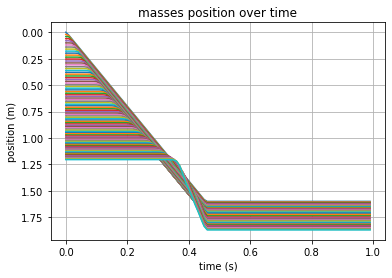

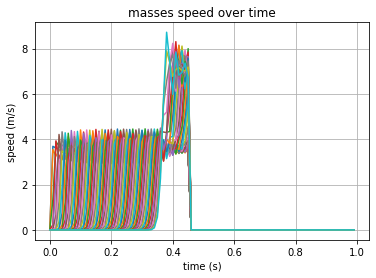

In [4]:
%matplotlib inline

for i in range(N):
    plt.plot(t_lista, l_lista[:, 2*i])       # plots the even indexes, related to position

plt.ylabel('position (m)')
plt.xlabel('time (s)')
plt.gca().invert_yaxis()
plt.title('masses position over time')
plt.grid(True)
plt.show()


for i in range(N):
    j = 0
    while j < len(t_lista):
        if l_lista[:, 2*i][j] == max(l_lista[:, 2*i]):      # if the mass gets to final position
            l_lista[:, 2*i+1][j] = 0                        # imposes v = 0 
        j+=1
    plt.plot(t_lista, l_lista[:, 2*i+1])                    # plots the odd indexes of the list, related to speed
    
plt.ylabel('speed (m/s)')
plt.xlabel('time (s)')
plt.title('masses speed over time')
plt.grid(True)
plt.show()

#### Attached masses 

Now, let's extend the experiment adding masses in the bottom of the toy. To analyze, lets plot graphics related only to the top and bottom masses.

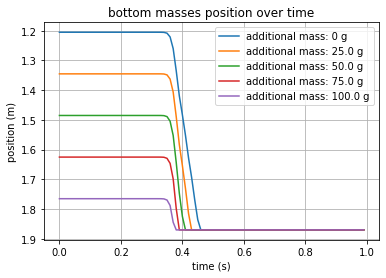

In [10]:
%matplotlib inline

t_reaçao = []     # creates the list that will contain the values of reaction time

massa_ultima = [0, 0.025, 0.05, 0.075, 0.1]       # list of attached masses (nothing, pack of cigaretts, tennis ball, egg, beef)
massa_ultima_g = []                               # creates the list that will contain the masses in g
i = 0
while i<len(massa_ultima):
    massa_ultima_g.append(massa_ultima[i]*1000)   # multiplies the mass in kg by 1000
    i+=1
    
    
for massa in massa_ultima:
    
    # recreates the starting positions to each value of attached mass, following the same logic before.
    
    y_inicial = [0]
    j = (M + massa - m)
    i = 1
    while i < N:
        y_inicial.append(y_inicial[i-1] + l0 + j*g/k)
        j -= m
        i += 1
        
    # recreates the starting conditions to each value of attached mass, following the same logic before.
        
    l_0 = []
    i=0
    while i < N:
        l_0.append(y_inicial[i])
        l_0.append(0)
        i+=1
    
    # recreates the solution list to each value of attached mass, following the same logic before.
    
    x = odeint(modelo, l_0, t_lista, args=(massa, ))
    plt.plot(t_lista, x[:, 178], label = 'additional mass: {} g'.format(1000*massa))   # plots the position graphics to each mass attached
    
    
    j = 0
    while j < len(x[:, 178]):
        if round(x[:, 178][j], 1) == round(x[:, 178][0], 1):   # if the masses postion didnt change
            j+=1
        else:                                                  # if the masses position changes
            t_reaçao.append(t_lista[j])                        # adds time of reaction to the list
            j = len(x[:, 178])
        
        
plt.ylabel('position (m)')
plt.xlabel('time (s)')
plt.title('bottom masses position over time')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True)
plt.show()

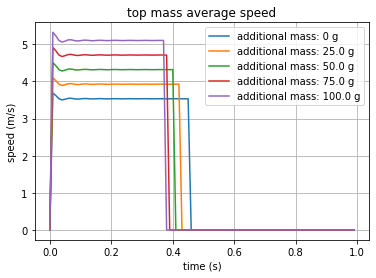

In [11]:
%matplotlib inline

v_media = []      # creates the list that will contain the values of average speed

for massa in massa_ultima:
    
    # recreates the starting positions to each value of attached mass, following the same logic before.
    
    y_inicial = [0]
    j = (M + massa - m)
    i = 1
    while i < N:
        y_inicial.append(y_inicial[i-1] + l0 + j*g/k)
        j -= m
        i += 1
        
    # recreates the starting conditions to each value of attached mass, following the same logic before.
    
    l_0 = []
    i=0
    while i < N:
        l_0.append(y_inicial[i])
        l_0.append(0)
        i+=1
        
    # recreates the solution list to each value of attached mass, following the same logic before.
    
    x = odeint(modelo, l_0, t_lista, args=(massa, ))

    j = 0
    while j < len(t_lista):
        if x[:, 0][j] == max(x[:, 0]):      # if mass gets to final position
            x[:, 1][j] = 0                  # imposes v = 0
        j+=1
    plt.plot(t_lista, x[:, 1], label = 'additional mass: {} g'.format(1000*massa))   # plots the speed graphics to each mass attached
    
    j = 1                                   
    while j < len(t_lista):
        if round(x[:, 1][j], 1) == 0.0:                      # if speed gets to value of 0
            v_media.append(sum(x[:, 1][1:(j-1)])/(j-1))      # adds average speed to list
            j = len(t_lista)
        else:
            j+=1


plt.ylabel('speed (m/s)')
plt.xlabel('time (s)')
plt.legend()
plt.title('top mass average speed')
plt.grid(True)
plt.show()

As observed in the video, the falling speed of the top mass is practically constant!

##### Conclusive graphics

Now, let's plot the graphics that answer the starting questions.

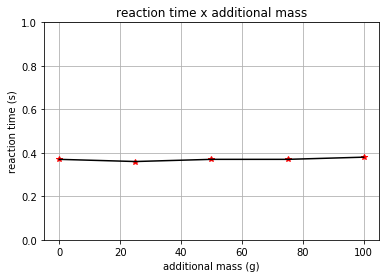

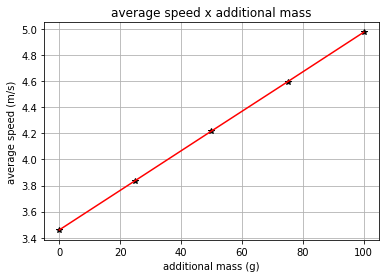

In [12]:
%matplotlib inline

# reaction time of the bottom mass

plt.plot(massa_ultima_g, t_reaçao, 'r*')
plt.plot(massa_ultima_g, t_reaçao, 'k')
plt.ylim(0, 1)
plt.ylabel('reaction time (s)')
plt.xlabel('additional mass (g)')
plt.title('reaction time x additional mass')
plt.grid(True)
plt.show()


# average speed of the top mass

plt.plot(massa_ultima_g, v_media, 'k*')
plt.plot(massa_ultima_g, v_media, 'r')
plt.ylabel('average speed (m/s)')
plt.xlabel('additional mass (g)')
plt.title('average speed x additional mass')
plt.grid(True)
plt.show()

### Validation

With the data obtained by the video analysis, by using Tracker software, it's possible to plot a graphic of the top and bottom masses position da mola inferior e superior. By ploting this graphic together with the models graphic, we can find the ideal values of ```M``` and ```K```.

<center>$M=225g$</center>
<center>$K=1,75 N/m$</center>


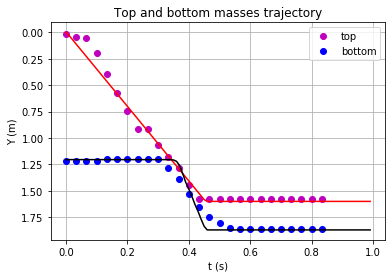

In [13]:
%matplotlib inline

import pandas
colunas = ['t', 'y', 'vy']
data = pandas.read_csv('massacima2.csv', names=colunas)        # import data obtained about top mass
data2 = pandas.read_csv('massabaixo2.csv', names=colunas)      # import data obtained about bottom mass

#transfer data to list

ttopo = data.t.tolist()
ytopo = data.y.tolist()
vytopo = data.vy.tolist()

tbaixo = data2.t.tolist()
ybaixo = data2.y.tolist()
vybaixo = data2.vy.tolist()

#eliminates the initial values of the video, when the experiment haven't started yet

i = 0
while i < len(ybaixo):
    if i < len(ybaixo) - 3:
        ybaixo[i] = ybaixo[i+3]
        ytopo[i] = ytopo[i+3]
    else:
        ybaixo[i] = ybaixo[len(ybaixo) - 3]
        ytopo[i] = ytopo[len(ybaixo) - 3]
    i+=1

t_real = []
ytopo1 = []
ybaixo1 = []
vytopo1 = []
vybaixo1 =[]

i = 0
while i < len(ybaixo) - 3:
    
    # ajusts time to t = 0 when the experiment begins in the video
    t_real.append(ttopo[i+3] - 0.1)
    
    #inverte os eixos
    ytopo1.append(ytopo[i]*(-1))
    vytopo1.append(vytopo[i]*(-1))
    ybaixo1.append(ybaixo[i]*(-1))
    vybaixo1.append(vybaixo[i]*(-1))
    i+=1

plt.title('Top and bottom masses trajectory')
plt.plot(t_real, ytopo1, 'mo', label = 'top')       # plots experimental data on the top mass
plt.plot(t_real, ybaixo1, 'bo', label = 'bottom')     # plots experimental data on the bottom mass
plt.plot(t_lista, l_lista[:, 0], 'r')                # plots model data on the top mass
plt.plot(t_lista, l_lista[:, 178], 'k')              # plots model data on the bottom mass

plt.ylabel('Y (m)')
plt.xlabel('t (s)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.legend()
plt.show()

### Animation

We can also create an animation of the simulation.

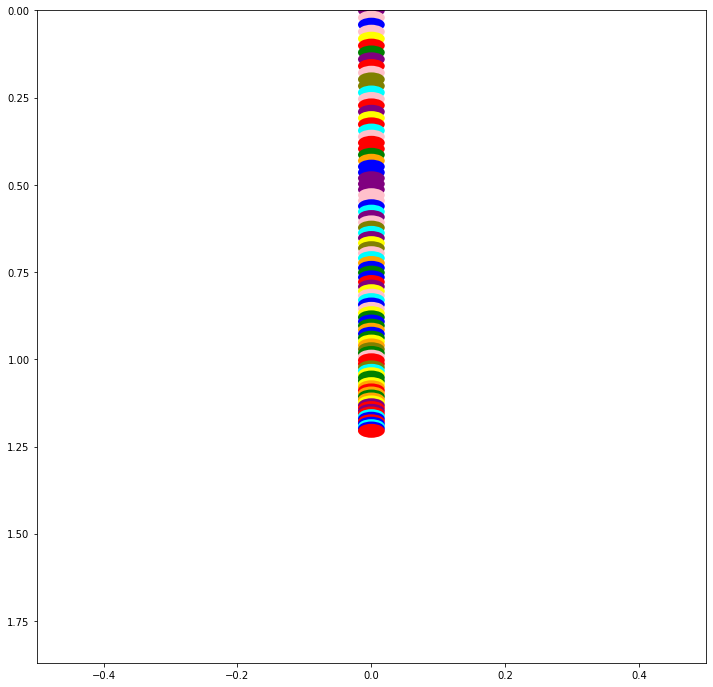

In [15]:
%matplotlib qt5

# recreates starting positions

y_inicial = [0]
j = (M - m)
i = 1
while i < N:
    y_inicial.append(y_inicial[i-1] + l0 + j*g/k)
    j -= m
    i += 1

# recreates starting conditons
    
l_0 = []
i=0
while i < N:
    l_0.append(y_inicial[i])
    l_0.append(0)
    i+=1
    
# recreates solution list

l_lista = odeint(modelo, l_0, t_lista, args=(0, ))  

# creates animation

plt.close('all')
get_ipython().magic('matplotlib qt5')
import matplotlib.patches as patches
from matplotlib import animation
import random

y = []
massas = []

# Determines size 
fig, ax = plt.subplots(figsize=(12,12), facecolor='white')
#plt.axis('equal')

# axis dimensions
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(1.87, 0)
ax.set_facecolor("white")

for i in range(N):
    y.append(l_lista[:, 2*i])
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink', 'olive', 'cyan', 'yellow']
    massas.append(patches.Circle((0, y_inicial[i]), 0.02, fc=random.choice(colors)))
    
def init():
    # includes figures
    for i in range(N):
        ax.add_patch(massas[i])
    return None

def animate(j):
    for i in range(N):
        massas[i].center=(0, y[i][j])
    return None

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(l_lista[:, 0]), interval=60, blit=False)
plt.show()

### References


https://mchouza.wordpress.com/2011/11/14/the-fall-of-the-slinky-i/

https://www.wired.com/2011/09/modeling-a-falling-slinky/

https://www.qsl.net/kd4cga/slinky.htm#:~:text=Clandestine%20Dipole,weighs%20approximately%201%2F2%20pound.